In [34]:
# Import libraries
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt

In [30]:
# Load DEMOG: NHANES Demographics from raw github
url = "https://raw.githubusercontent.com/NeuroDataDesign/ProgLearn_2021-2022/main/Tiffany_Chu/NHANES_Data/CSV/demog.csv"
demog = pd.read_csv(url, sep=",", error_bad_lines=False)

# print(size of demog)

print("Dimensions of demographics information are:")
print(demog.shape)

#Variables need to be decoded individually
#note: couldn't get xport to work with Github files so did this manually

titles = {"SEQN": "Respondent sequence number","SDDSRVYR": "Data release cycle",
          "RIDSTATR": "Interview/Examination status","RIAGENDR": "Gender",
          "RIDAGEYR": "Age in years at screening","RIDAGEMN": "Age in months at screening (0-24mo)",
          "RIDRETH1": "Race/Hispanic origin","RIDRETH3": "Race/Hispanic origin w/ NH Asian",
          "RIDEXMON": "Six-month time period","DMDBORN4": "Country of birth",
          "DMDYRUSZ": "Length of time in US","DMDEDUC2": "Education level (Adults 20+)",
          "DMDMARTZ": "Marital status","RIDEXPRG": "Pregnancy status at exam",
          "SIALANG": "Language of SP Interview", "SIAPROXY": "Proxy used in SP Interview?",
          "SIAINTRP": "Interpreter used in SP Interview?",
          "FIALANG": "Language of Family Interview","FIAPROXY": "Proxy used in Family Interview?",
          "FIAINTRP": "Interpreter used in Family Interview?",
          "MIALANG": "Language of MEC Interview","MIAPROXY": "Proxy used in MEC Interview?",
          "MIAINTRP": "Interpreter used in MEC Interview?",
          "AIALANGA": "Language of ACASI Interview",
          "WTINTPRP": "Full sample interview weight",
          "WTMECPRP": "Full sample MEC exam weight",
          "SDMVPSU": "Masked variance pseudo-PSU",
          "SDMVSTRA": "Masked variance pseudo-stratum",
          "INDFMPIR": "Ratio of family income to poverty"}

# categorical variables
catvars = {}
# Was participant examined?
catvars["RIDSTATR"] = {1: "Interviewed only", 2: "Interviewed and MEC examined"}
# Gender/Ethnicity
catvars["RIAGENDR"] = {1: "Male", 2: "Female"}
catvars["RIDRETH1"] = {1: "Mexican American", 2: "Other Hispanic",
                       3: "Non-Hispanic White", 4: "Non-Hispanic Black",
                       5: "Other/Multi"}
catvars["RIDRETH3"] = {1: "Mexican American", 2: "Other Hispanic",
                       3: "Non-Hispanic White", 4: "Non-Hispanic Black",
                       6: "Non-Hispanic Asian", 7: "Other/Multi"}
# When was this survey administered                      
catvars["RIDEXMON"] =  {1: "November 1-April 30", 2: "May 1-October 31"}
# Birth Location
catvars["DMDBORN4"] =  {1: "50 US states/Washington, DC",
                        2: "Others", 77: "Refused", 99: "Don't Know"}
# Time spent in USA
catvars["DMDYRUSZ"] = {1: "<5 years", 2: "5-15 years", 3: "15-30 years",
                       4: "30+ years", 77: "Refused", 99: "Don't Know"}
# Highest educational attainment                       
catvars["DMDEDUC2"] = {1: "Less than 9th grade", 2: "9-11th grade",
                       3: "High school/GED",
                       4: "Some college or AA degree",
                       5: "College graduate or above",
                       7: "Refused", 9: "Don't Know"}
# Marital Status                      
catvars["DMDMARTZ"] = {1:"Married/Cohabitating", 2:"Widowed/Divorced/Separated",
                       3:"Never married", 7: "Refused", 9: "Don't Know"}
# Pregnancy status at exam                       
catvars["RIDEXPRG"] = {1: "Yes", 2: "No", 3: "Uncertain"}
# Language of SP Interview
catvars["SIALANG"] = {1: "English", 2: "Spanish"}
catvars["SIAPROXY"] = {1: "Yes", 2: "No"}
catvars["SIAINTRP"] = {1: "Yes", 2: "No"}
# Language of Family interview
catvars["FIALANG"] = {1: "English", 2: "Spanish"}
catvars["FIAPROXY"] = {1: "Yes", 2: "No"}
catvars["FIAINTRP"] = {1: "Yes", 2: "No"}
# Language of MEC exam interview
catvars["MIALANG"] = {1: "English", 2: "Spanish"}
catvars["MIAPROXY"] = {1: "Yes", 2: "No"}
catvars["MIAINTRP"] = {1: "Yes", 2: "No"}
# Language of ACASI Interview
catvars["AIALANGA"] = {1: "English", 2: "Spanish", 3: "Asian languages"}
 
#Quantitative Variables - units
quantvars = {}
# Age in years at screening 
quantvars["RIDAGEYR"] = "Years"
# Age in months at screening
quantvars["RIDAGEMN"] = "Months"
# Full sample interview weight
quantvars["WTINTPRP"] = "Weight (sample interview)"
# Full sample MEC exam weight
quantvars["WTMECPRP"] = "Weight (MEC exam)"
# Masked variance pseudo-PSU
quantvars["SDMVPSU"] = "Primary sampling unit variance (masked)"
# Masked variance pseudo-stratum
quantvars["SDMVSTRA"] = "Primary sampling unit variance (masked)"
# Ratio of family income to poverty
quantvars["INDFMPIR"] = "Income/poverty line"


Dimensions of demographics information are:
(15560, 29)


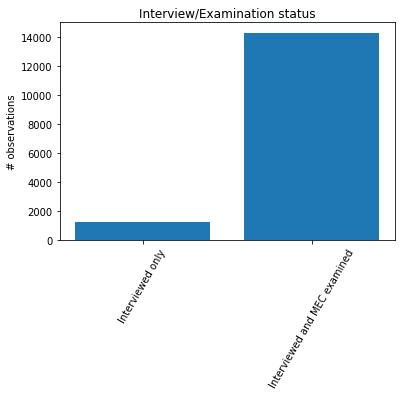

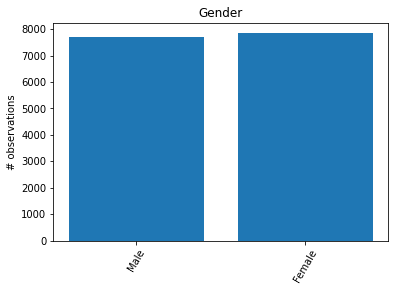

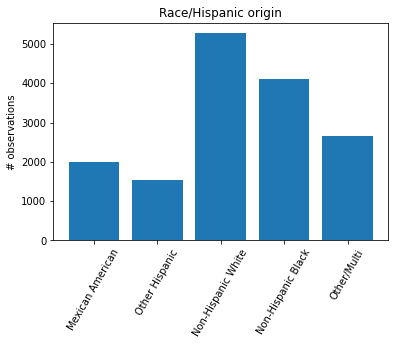

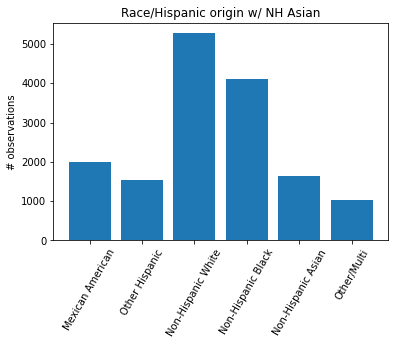

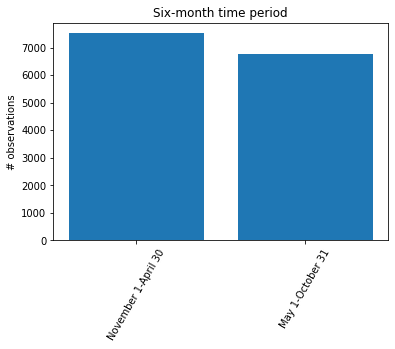

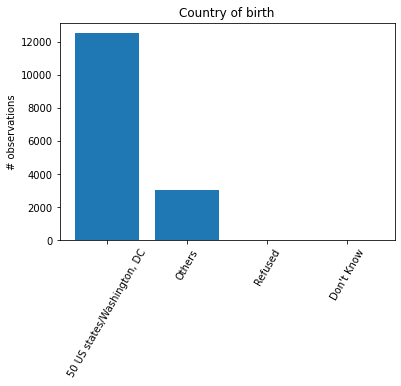

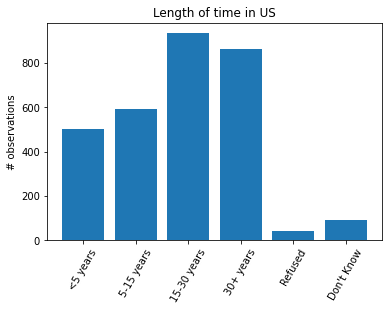

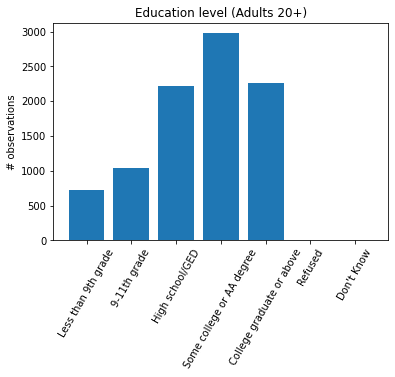

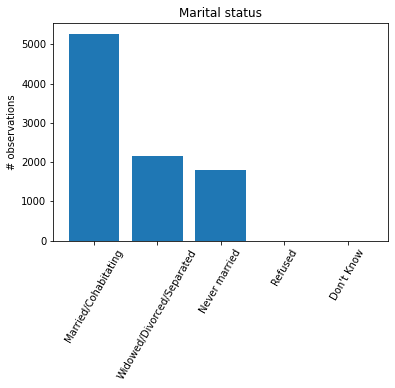

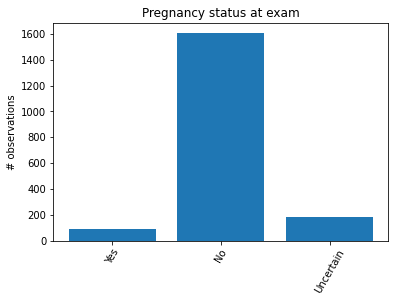

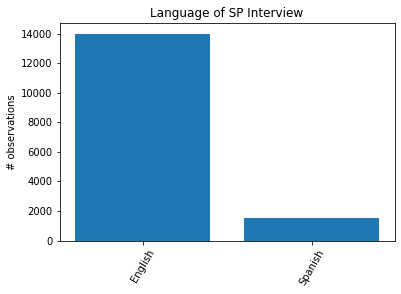

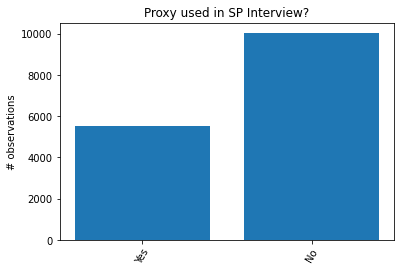

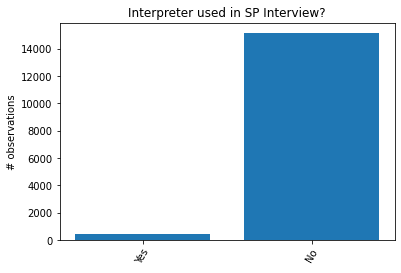

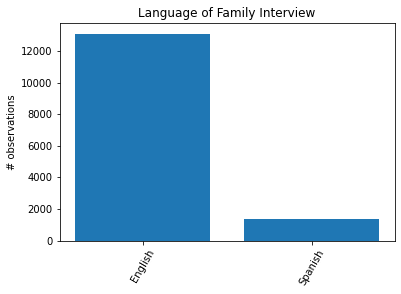

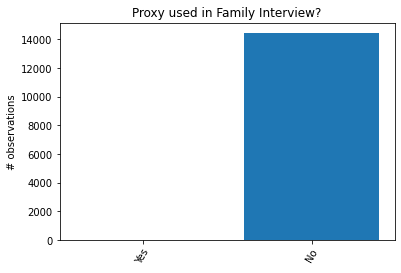

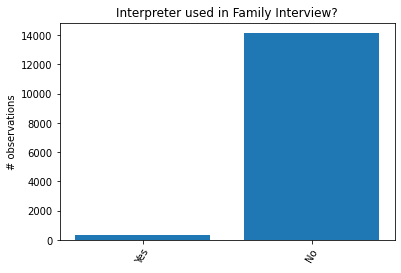

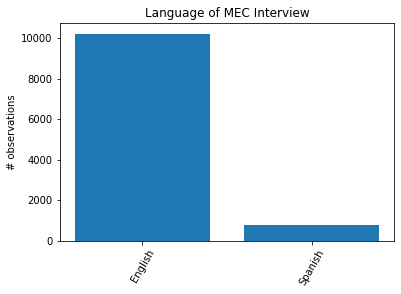

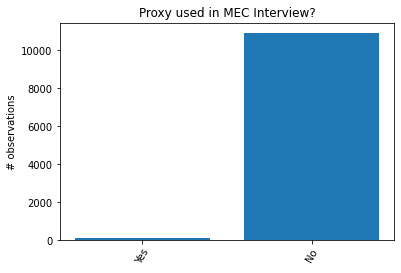

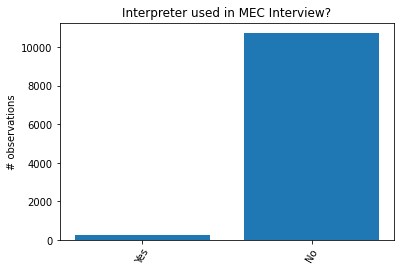

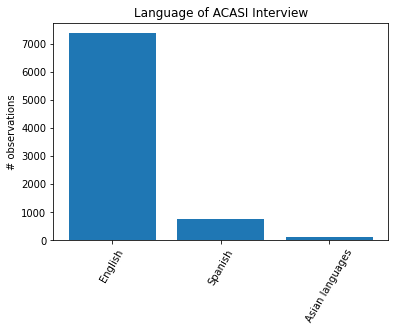

In [31]:
for cv in catvars:
  # Plot cv as bar chart
  
  fig = plt.figure()
  demog_cv = [len(demog[cv][demog[cv]==i]) for i in catvars[cv]]
  #print(demog_cv)
  y_pos = np.arange(len(catvars[cv]))
  plt.bar(y_pos, demog_cv)
  plt.title(titles[cv])
  plt.ylabel("# observations")
  plt.xticks(y_pos, catvars[cv].values(), rotation=60)